In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('data.xlsx', skiprows=2)

In [3]:
df['year'] = pd.DatetimeIndex(df['data obrotu']).year
df['month'] = pd.DatetimeIndex(df['data obrotu']).month
df['day'] = pd.DatetimeIndex(df['data obrotu']).day

In [4]:
df_ = pd.DataFrame({'year': df['year'],
                     'month': df['month'],
                     'day': df['day']})

In [5]:
df['godzina dostawy'] = pd.to_numeric(df['godzina dostawy'], errors='coerce')

In [6]:
df['godzina dostawy'].isnull().sum()

1

In [7]:
df = df.dropna()

In [8]:
df['date'] = pd.to_datetime(df_) + pd.to_timedelta(df['godzina dostawy'], unit='h')

In [9]:
df.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#008080'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana'),
            ('color', 'black')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
  {'selector': 'tr:hover',
  'props': [('background', 'yellow')]},
]).hide_index()

data obrotu,data dostawy,godzina dostawy,kurs fixingu I (PLN/MWh),wolumen fixingu I (MWh),kurs fixingu II (PLN/MWh),wolumen fixingu II (MWh),kurs notowan ciaglych (PLN/MWh),wolumen notowan ciaglych (MWh),year,month,day,date
2019-02-01 00:00:00,2019-02-02 00:00:00,1,208.83,2006.8,212.32,1066.2,-,-,2019,2,1,2019-02-01 01:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,2,201,2270.5,204.09,1155.6,-,-,2019,2,1,2019-02-01 02:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,3,195,2644.8,191.37,1256,195.00,10.00,2019,2,1,2019-02-01 03:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,4,189,2355.7,188.38,1192.7,190.25,20.00,2019,2,1,2019-02-01 04:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,5,189.26,2324.5,189.68,1260.8,190.25,20.00,2019,2,1,2019-02-01 05:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,6,191.21,2364.9,190.34,1233.5,191.50,10.00,2019,2,1,2019-02-01 06:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,7,203,2264.2,205.73,1095.3,203.00,10.00,2019,2,1,2019-02-01 07:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,8,213.81,2199.4,212.72,1139.4,-,-,2019,2,1,2019-02-01 08:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,9,229,2279.3,220.41,625.9,-,-,2019,2,1,2019-02-01 09:00:00
2019-02-01 00:00:00,2019-02-02 00:00:00,10,242.76,2721.3,228.16,934.5,-,-,2019,2,1,2019-02-01 10:00:00


C:\Users\Przem\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


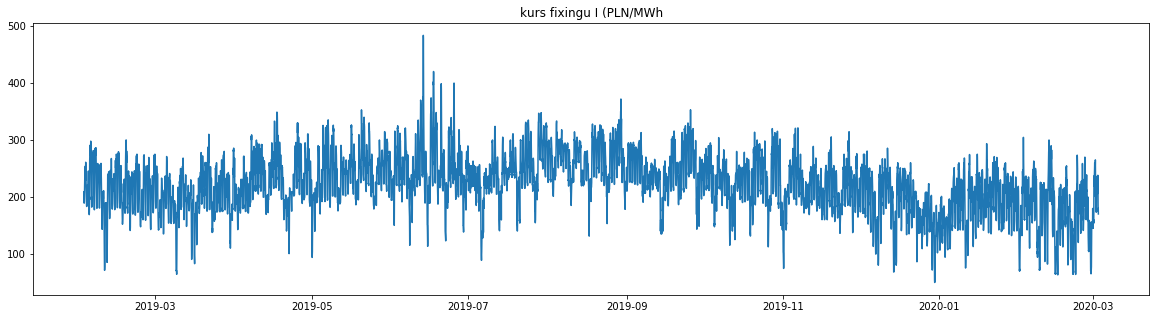

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df['date'], df['kurs fixingu I (PLN/MWh)'])
plt.title("kurs fixingu I (PLN/MWh")
params = {"ytick.color" : "w",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"
        }
plt.rcParams.update(params)
plt.show()

In [11]:
df = pd.DataFrame(data={'Date': df['date'], 'Kurs fixing':df['kurs fixingu I (PLN/MWh)']})

In [12]:
price = df[['Kurs fixing']]
scaler = MinMaxScaler(feature_range=(-1, 1))
# price['Kurs fixing'] = scaler.fit_transform(price['Kurs fixing'].values.reshape(-1,1))
price['Kurs fixing'] = scaler.fit_transform(price['Kurs fixing'].values.reshape(-1,1))

NameError: name 'MinMaxScaler' is not defined